# Data set Description

Consists of 2225 documents from the BBC news website corresponding to stories in five topical areas from 2004-2005.
Natural Classes: 5 (business, entertainment, politics, sport, tech)

If you make use of the dataset, please consider citing the publication:
- D. Greene and P. Cunningham. "Practical Solutions to the Problem of Diagonal Dominance in Kernel Document Clustering", Proc. ICML 2006.

All rights, including copyright, in the content of the original articles are owned by the BBC.

Contact Derek Greene <derek.greene@ucd.ie> for further information.
http://mlg.ucd.ie/datasets/bbc.html

Using this dataset we have implemented Naive Bayes Algorithm to classify a news into 5 classes.

# File Handling

In [1]:
import os
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings(action = 'ignore')

In [2]:
# Specify the path to the main folder
main_folder = "/content/drive/MyDrive/ML_DA/bbc/business"

# Initialize an empty list to store the file paths
file_paths = []

# Iterate through the main folder and its subfolders
for root, dirs, files in os.walk(main_folder):
    files.sort()
    for file in files:
        file_paths.append(os.path.join(root, file))

# Initialize an empty dataframe
business_df = pd.DataFrame()

# Iterate through the file paths and read the text files into the dataframe
for file_path in file_paths:
    with open(file_path, "r") as file:
        content = file.read()
        temp = pd.DataFrame({"File Name": [file_path.split('/')[-1]], "title": [content.split('\n\n')[0]],'news':[' '.join(content.split('\n\n')[1:])],'label':'business'})
        business_df = pd.concat([business_df,temp], ignore_index=True)

In [3]:
# Specify the path to the main folder
main_folder = "/content/drive/MyDrive/ML_DA/bbc/entertainment"

# Initialize an empty list to store the file paths
file_paths = []

# Iterate through the main folder and its subfolders
for root, dirs, files in os.walk(main_folder):
    files.sort()
    for file in files:
        file_paths.append(os.path.join(root, file))

# Initialize an empty dataframe
entertainment_df = pd.DataFrame()

# Iterate through the file paths and read the text files into the dataframe
for file_path in file_paths:
    with open(file_path, "r") as file:
        content = file.read()
        temp = pd.DataFrame({"File Name": [file_path.split('/')[-1]], "title": [content.split('\n\n')[0]],'news':[' '.join(content.split('\n\n')[1:])],'label':'entertainment'})
        entertainment_df = pd.concat([entertainment_df,temp], ignore_index=True)


In [4]:
# Specify the path to the main folder
main_folder = "/content/drive/MyDrive/ML_DA/bbc/politics"

# Initialize an empty list to store the file paths
file_paths = []

# Iterate through the main folder and its subfolders
for root, dirs, files in os.walk(main_folder):
    files.sort()
    for file in files:
        file_paths.append(os.path.join(root, file))

# Initialize an empty dataframe
politics_df = pd.DataFrame()

# Iterate through the file paths and read the text files into the dataframe
for file_path in file_paths:
    with open(file_path, "r") as file:
        content = file.read()
        temp = pd.DataFrame({"File Name": [file_path.split('/')[-1]], "title": [content.split('\n\n')[0]],'news':[' '.join(content.split('\n\n')[1:])],'label':['politics']})
        politics_df = pd.concat([politics_df,temp], ignore_index=True)


In [5]:
# Specify the path to the main folder
main_folder = "/content/drive/MyDrive/ML_DA/bbc/sport"

# Initialize an empty list to store the file paths
file_paths = []

# Iterate through the main folder and its subfolders
for root, dirs, files in os.walk(main_folder):
    files.sort()
    for file in files:
        file_paths.append(os.path.join(root, file))

# Initialize an empty dataframe
sport_df = pd.DataFrame()

# Iterate through the file paths and read the text files into the dataframe
for file_path in file_paths:
    with open(file_path, "r") as file:
        content = file.read()
        temp = pd.DataFrame({"File Name": [file_path.split('/')[-1]], "title": [content.split('\n\n')[0]],'news':[' '.join(content.split('\n\n')[1:])],'label':['sport']})
        sport_df = pd.concat([sport_df,temp], ignore_index=True)


In [6]:
# Specify the path to the main folder
main_folder = "/content/drive/MyDrive/ML_DA/bbc/tech"

# Initialize an empty list to store the file paths
file_paths = []

# Iterate through the main folder and its subfolders
for root, dirs, files in os.walk(main_folder):
    files.sort()
    for file in files:
        file_paths.append(os.path.join(root, file))

# Initialize an empty dataframe
tech_df = pd.DataFrame()

# Iterate through the file paths and read the text files into the dataframe
for file_path in file_paths:
    with open(file_path, "r") as file:
        content = file.read()
        temp = pd.DataFrame({"File Name": [file_path.split('/')[-1]], "title": [content.split('\n\n')[0]],'news':[' '.join(content.split('\n\n')[1:])],'label':['tech']})
        tech_df = pd.concat([tech_df,temp], ignore_index=True)


In [7]:
# business_df.head()

In [8]:
# entertainment_df.head()

In [9]:
# politics_df.head()

In [10]:
# sport_df.head()

In [11]:
# tech_df.head()

# Main DataFrame

In [12]:
data = pd.concat([business_df,entertainment_df,politics_df,sport_df,tech_df],ignore_index = True)
data.head()

,File Name,title,news,label
0,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarner...,business
1,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against t...,business
2,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuko...,business
3,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices fo...,business
4,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Domec...,business


In [13]:
data.shape

(2225, 4)

In [14]:
data.label.value_counts()

sport            511
business         510
politics         417
tech             401
entertainment    386
Name: label, dtype: int64

In [15]:
data.label.unique()

array(['business', 'entertainment', 'politics', 'sport', 'tech'],
      dtype=object)

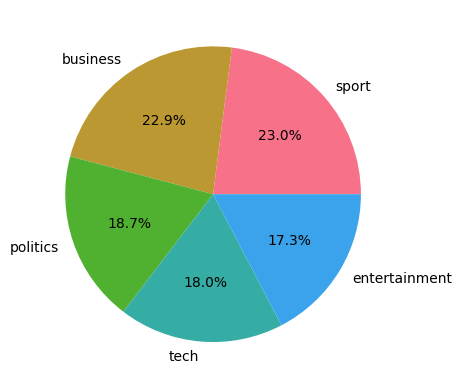

In [16]:
#define Seaborn color palette to use
colors = sns.color_palette('husl')
plt.pie(data.label.value_counts(),labels= ['sport','business','politics','tech','entertainment'],colors=colors,autopct='%0.1f%%')
plt.show()

# Feature Engineering

In [17]:
# !pip install gensim
# !pip install nltk

**Concatenating all the text**

In [18]:
data['content'] = data['title']+' '+data['news']

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   File Name  2225 non-null   object
 1   title      2225 non-null   object
 2   news       2225 non-null   object
 3   label      2225 non-null   object
 4   content    2225 non-null   object
dtypes: object(5)
memory usage: 87.0+ KB


In [20]:
import gensim
import nltk

**Tokenizing the texts**

In [21]:
data['tokens'] = data.content.apply(gensim.utils.simple_preprocess)
data['tokens'] = data.tokens.apply(lambda x: ' '.join(x))

In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   File Name  2225 non-null   object
 1   title      2225 non-null   object
 2   news       2225 non-null   object
 3   label      2225 non-null   object
 4   content    2225 non-null   object
 5   tokens     2225 non-null   object
dtypes: object(6)
memory usage: 104.4+ KB


In [23]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['y'] = le.fit_transform(data.label)

After label encoding:

The encoded values of each class is:

1. Business : 0
2. Entertainment : 1
3. Politics : 2
4. Sport : 3
5. Tech : 4

In [24]:
data.head()

,File Name,title,news,label,content,tokens,y
0,001.txt,Ad sales boost Time Warner profit,Quarterly profits at US media giant TimeWarner...,business,Ad sales boost Time Warner profit Quarterly pr...,ad sales boost time warner profit quarterly pr...,0
1,002.txt,Dollar gains on Greenspan speech,The dollar has hit its highest level against t...,business,Dollar gains on Greenspan speech The dollar ha...,dollar gains on greenspan speech the dollar ha...,0
2,003.txt,Yukos unit buyer faces loan claim,The owners of embattled Russian oil giant Yuko...,business,Yukos unit buyer faces loan claim The owners o...,yukos unit buyer faces loan claim the owners o...,0
3,004.txt,High fuel prices hit BA's profits,British Airways has blamed high fuel prices fo...,business,High fuel prices hit BA's profits British Airw...,high fuel prices hit ba profits british airway...,0
4,005.txt,Pernod takeover talk lifts Domecq,Shares in UK drinks and food firm Allied Domec...,business,Pernod takeover talk lifts Domecq Shares in UK...,pernod takeover talk lifts domecq shares in uk...,0


**Stemming**

In [25]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
data['tokens'] = data.tokens.apply(lambda x: ' '.join([ps.stem(y) for y in x.split()]))

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.tokens, data.y, test_size = 0.3, random_state = 42)

Saving the Training and Testing data

In [27]:
Train = pd.DataFrame(X_train)
Train['label'] = y_train

Train.to_csv('Train.csv', index=False)

Test = pd.DataFrame(X_test)
Test['label'] = y_test

Test.to_csv('Test.csv', index=False)

In [28]:
X_train.shape, X_test.shape

((1557,), (668,))

# Model Building and Evaluation

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MaxAbsScaler
from sklearn.pipeline import Pipeline

**Multinomial Naive Bayes**

In [30]:
from sklearn.naive_bayes import MultinomialNB

#Define the pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(max_features=3000)),  # CountVectorizer for text to vector conversion
    ('scaler', MaxAbsScaler()),  # MaxAbsScaler for feature scaling
    ('naive_bayes', MultinomialNB())  # Naive Bayes classifier
])

# Fit and transform the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on new data
y_pred = pipeline.predict(X_test)


In [31]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
print(f"The accuracy of the {pipeline.steps[2][1].__class__.__name__} is : {round(accuracy_score(y_test, y_pred)*100,2)}% and The f1-score of the model is : {round(f1_score(y_test, y_pred, average = 'macro')*100, 2)}%")

The accuracy of the MultinomialNB is : 95.06% and The f1-score of the model is : 95.08%


In [32]:
print(f"The confusion matrix for {pipeline.steps[2][1].__class__.__name__} is:\n {confusion_matrix(y_test, y_pred)}")

The confusion matrix for MultinomialNB is:
 [[153   2   6   0   4]
 [  4 110   3   0   1]
 [  4   0 115   0   1]
 [  1   0   1 138   0]
 [  2   3   1   0 119]]


In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.93      0.93       165
           1       0.96      0.93      0.94       118
           2       0.91      0.96      0.93       120
           3       1.00      0.99      0.99       140
           4       0.95      0.95      0.95       125

    accuracy                           0.95       668
   macro avg       0.95      0.95      0.95       668
weighted avg       0.95      0.95      0.95       668



**Bernoulli Naive Bayes**

In [34]:
from sklearn.naive_bayes import BernoulliNB

#Define the pipeline
pipeline = Pipeline([
    ('vectorizer', CountVectorizer(max_features=3000)),  # CountVectorizer for text to vector conversion
    ('scaler', MaxAbsScaler()),  # MaxAbsScaler for feature scaling
    ('naive_bayes', BernoulliNB())  # Naive Bayes classifier
])

# Fit and transform the pipeline on the training data
pipeline.fit(X_train, y_train)

# Predict on new data
y_pred = pipeline.predict(X_test)


In [35]:
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
print(f"The accuracy of the {pipeline.steps[2][1].__class__.__name__} is : {round(accuracy_score(y_test, y_pred)*100,2)}% and The f1-score of the model is : {round(f1_score(y_test, y_pred, average = 'macro')*100, 2)}%")

The accuracy of the BernoulliNB is : 94.31% and The f1-score of the model is : 94.33%


In [36]:
print(f"The confusion matrix for {pipeline.steps[2][1].__class__.__name__} is:\n {confusion_matrix(y_test, y_pred)}")

The confusion matrix for BernoulliNB is:
 [[158   1   5   0   1]
 [  2 112   1   0   3]
 [  8   2 108   2   0]
 [  1   0   0 139   0]
 [  9   3   0   0 113]]


In [37]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.96      0.92       165
           1       0.95      0.95      0.95       118
           2       0.95      0.90      0.92       120
           3       0.99      0.99      0.99       140
           4       0.97      0.90      0.93       125

    accuracy                           0.94       668
   macro avg       0.95      0.94      0.94       668
weighted avg       0.94      0.94      0.94       668

